This notebook is adapted from https://colab.research.google.com/github/mlittmancs/great_courses_ml/blob/master/L08aux.ipynb courtesy of [Mohannad Elhamod](https://wordpress.cs.vt.edu/elhamod/).

This notebook builds a classifier for comfortable climate based on relative humidity and temperature.  The classifiers we will use are decision trees and k-nearest neighbors. 

We import our libraries below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CS4664')

Mounted at /content/drive


In [ ]:
import random
import math

import numpy as np

import graphviz 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split

import pandas as pd

from IPython.display import display, HTML

from isComfortable import comfort

sns.set_palette('colorblind')

We will create N random temperature relative humidity combinatons.

We now will train a decision tree classifier, print the number of correctly classified datapoints.

We will also plot the data we have generated below

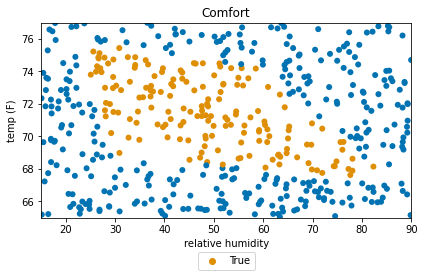

In [ ]:
# Create N datapoints as a dataframe (i.e. table)
N_total = 10500 # training and testing
N_test = 10000 # training and testing

all_dat = pd.DataFrame(columns=['temp (F)', 'relative humidity'], index=range(N_total))
all_dat['temp (F)'] = np.random.uniform(65, 77, N_total)
all_dat['relative humidity'] = np.random.uniform(15,90, N_total)
all_dat['labs'] = pd.Series([comfort(all_dat['temp (F)'].loc[i], all_dat['relative humidity'].loc[i]) for i in range(N_total)])

# Split data into training and testing
dat, test_dat, labs, test_labs = train_test_split(all_dat[['temp (F)', 'relative humidity']],
                                                  all_dat['labs'], test_size=N_test)

# Plot training data
ax = sns.scatterplot(x='relative humidity', y='temp (F)', hue='labs', data=pd.concat([dat, labs], axis=1), linewidth=0, marker='o')
h,l = ax.get_legend_handles_labels()
plt.ylim(65,77)
plt.xlim(15,90)
plt.legend(h[1:], l[1:], bbox_to_anchor=(0.5, -0.15), loc="upper center", ncol=2)
plt.title('Comfort')
plt.tight_layout()

We train a decision tree classifier with 10 leaf nodes and print the training accuracy below.

In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)

clf = clf.fit(dat, labs)
correct = sum(clf.predict(dat) == labs)
print(correct/len(dat))

0.968


Below is the test set accuracy.

In [ ]:
test_correct = sum(clf.predict(test_dat) == test_labs)
print(test_correct/len(test_dat))

0.9202


In the following code block we:

- plot the results with the following colors:
  - yellow: true positives
  - blue: true negatives
  - green: false postives
  - orange: false negatives

In [ ]:
# Create test data
def get_predictions(predictions, labels):
  prediction_info = pd.Series(index=labels.index, name='prediction')
  prediction_info.loc[np.logical_and(~predictions, ~labels)] = '0 true negative'
  prediction_info.loc[np.logical_and(predictions, labels)] = '1 true positive'
  prediction_info.loc[np.logical_and(predictions, ~labels)]= '2 false positive'
  prediction_info.loc[np.logical_and(~predictions, labels)] = '3 false negative'
  return prediction_info


test_prediction_data = get_predictions(pd.Series(clf.predict(test_dat), index=test_labs.index), test_labs)

test_prediction_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


9170     1 true positive
4139     1 true positive
1560    2 false positive
9378     0 true negative
268      0 true negative
              ...       
3600     1 true positive
9477    3 false negative
6893     0 true negative
7562     1 true positive
3764     0 true negative
Name: prediction, Length: 10000, dtype: object

(15.0, 90.0)

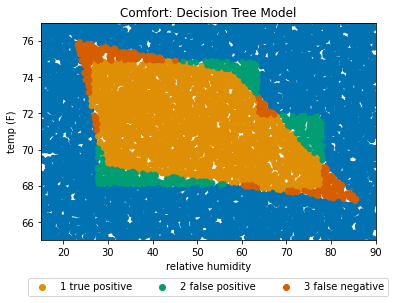

In [ ]:
# plot test data
ax = sns.scatterplot(y='temp (F)', x='relative humidity', hue='prediction',
                     data=pd.concat([test_dat,
                                     test_prediction_data], axis=1).sort_values(by='prediction',
                                                                      ascending=True), linewidth=0, marker='o')
h,l = ax.get_legend_handles_labels()
plt.legend(h[1:], l[1:], bbox_to_anchor=(0.5, -0.15), loc="upper center", ncol=4)
plt.title('Comfort: Decision Tree Model')
plt.ylim(65,77)
plt.xlim(15,90)

Next, we will visualize the decision rules learned by the decision tree we trained

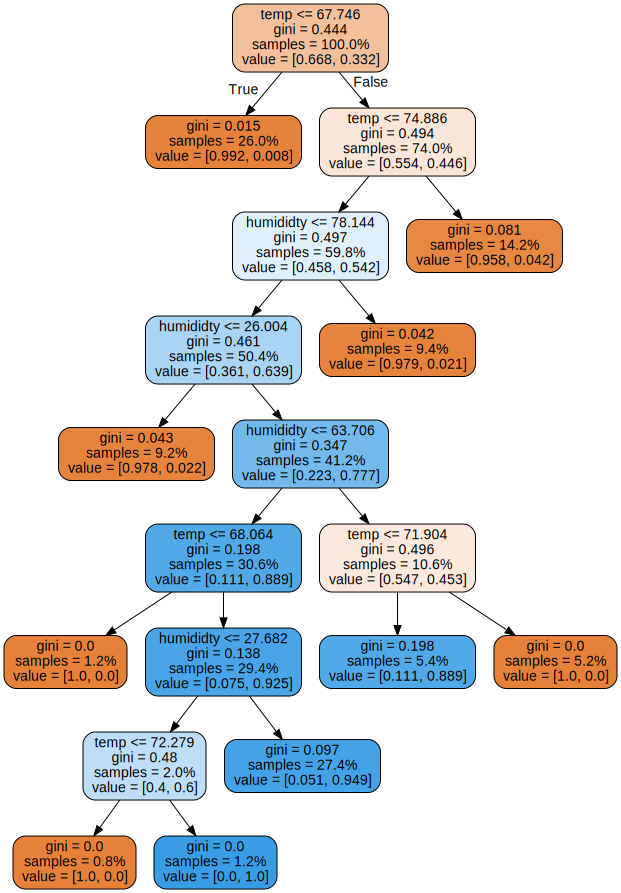

In [ ]:
dot_data = tree.export_graphviz(clf, feature_names=["temp","humididty"],
                      filled=True, rounded=True, proportion=True) 
graph = graphviz.Source(dot_data)	
graph	

***********************

Now we'll train a k-nearest neighbors classifier where k=5

We will then caluclate the percent of examples that were predicted correctly within the training set

In [ ]:
n_neighbors_hyperp = 5

clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors_hyperp)
clf = clf.fit(dat, labs)
correct = sum(clf.predict(dat) == labs)/len(dat.index)
print(correct)

0.968


We also calculate the accuracy on the test set

In [ ]:
correct = sum(clf.predict(test_dat) == test_labs)/len(test_dat.index)
print(correct)

0.931


We also will plot the:

- true positives
- false positives
- true negatives
- false negatives

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


(15.0, 90.0)

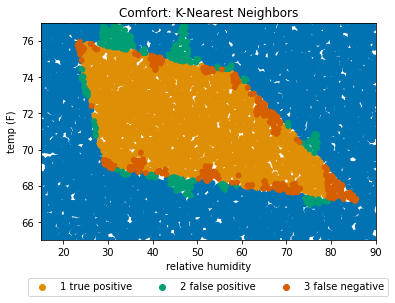

In [ ]:
ax = sns.scatterplot(y='temp (F)', x='relative humidity', hue='prediction',
                     data=pd.concat([test_dat,
                                     get_predictions(pd.Series(clf.predict(test_dat), index=test_labs.index),
                                     test_labs)], axis=1).sort_values(by='prediction',
                                                                      ascending=True), linewidth=0, marker='o')
h,l = ax.get_legend_handles_labels()
plt.legend(h[1:], l[1:], bbox_to_anchor=(0.5, -0.15), loc="upper center", ncol=4)
plt.title('Comfort: K-Nearest Neighbors')
plt.ylim(65,77)
plt.xlim(15,90)

Now, let's try different values of K and see their effect.

  3%|▎         | 1/39 [00:00<00:11,  3.18it/s]

degree 1 test_acc: 0.9372 train_acc: 1.0


  5%|▌         | 2/39 [00:00<00:11,  3.20it/s]

degree 2 test_acc: 0.9293 train_acc: 0.968


  8%|▊         | 3/39 [00:00<00:11,  3.23it/s]

degree 3 test_acc: 0.9366 train_acc: 0.968


 10%|█         | 4/39 [00:01<00:11,  3.13it/s]

degree 4 test_acc: 0.9332 train_acc: 0.964


 13%|█▎        | 5/39 [00:01<00:10,  3.17it/s]

degree 5 test_acc: 0.931 train_acc: 0.968


 15%|█▌        | 6/39 [00:01<00:10,  3.18it/s]

degree 6 test_acc: 0.9292 train_acc: 0.966


 18%|█▊        | 7/39 [00:02<00:10,  3.18it/s]

degree 7 test_acc: 0.9259 train_acc: 0.96


 21%|██        | 8/39 [00:02<00:09,  3.22it/s]

degree 8 test_acc: 0.9236 train_acc: 0.958


 23%|██▎       | 9/39 [00:02<00:09,  3.19it/s]

degree 9 test_acc: 0.917 train_acc: 0.944


 26%|██▌       | 10/39 [00:03<00:09,  3.21it/s]

degree 10 test_acc: 0.9156 train_acc: 0.94


 28%|██▊       | 11/39 [00:03<00:09,  2.89it/s]

degree 11 test_acc: 0.911 train_acc: 0.946


 31%|███       | 12/39 [00:03<00:09,  2.95it/s]

degree 12 test_acc: 0.9079 train_acc: 0.934


 33%|███▎      | 13/39 [00:04<00:08,  3.04it/s]

degree 13 test_acc: 0.9074 train_acc: 0.934


 36%|███▌      | 14/39 [00:04<00:08,  3.05it/s]

degree 14 test_acc: 0.9013 train_acc: 0.93


 38%|███▊      | 15/39 [00:04<00:07,  3.06it/s]

degree 15 test_acc: 0.9045 train_acc: 0.928


 41%|████      | 16/39 [00:05<00:07,  3.11it/s]

degree 16 test_acc: 0.8971 train_acc: 0.924


 44%|████▎     | 17/39 [00:05<00:07,  3.03it/s]

degree 17 test_acc: 0.8922 train_acc: 0.918


 46%|████▌     | 18/39 [00:05<00:06,  3.02it/s]

degree 18 test_acc: 0.8908 train_acc: 0.914


 49%|████▊     | 19/39 [00:06<00:06,  2.99it/s]

degree 19 test_acc: 0.8835 train_acc: 0.908


 51%|█████▏    | 20/39 [00:06<00:06,  2.99it/s]

degree 20 test_acc: 0.8828 train_acc: 0.906


 54%|█████▍    | 21/39 [00:06<00:06,  3.00it/s]

degree 21 test_acc: 0.8772 train_acc: 0.902


 56%|█████▋    | 22/39 [00:07<00:05,  3.02it/s]

degree 22 test_acc: 0.8719 train_acc: 0.898


 59%|█████▉    | 23/39 [00:07<00:05,  3.02it/s]

degree 23 test_acc: 0.8694 train_acc: 0.902


 62%|██████▏   | 24/39 [00:07<00:04,  3.02it/s]

degree 24 test_acc: 0.8639 train_acc: 0.896


 64%|██████▍   | 25/39 [00:08<00:04,  3.01it/s]

degree 25 test_acc: 0.8639 train_acc: 0.896


 67%|██████▋   | 26/39 [00:08<00:04,  2.94it/s]

degree 26 test_acc: 0.8613 train_acc: 0.898


 69%|██████▉   | 27/39 [00:08<00:04,  2.94it/s]

degree 27 test_acc: 0.8595 train_acc: 0.888


 72%|███████▏  | 28/39 [00:09<00:03,  2.96it/s]

degree 28 test_acc: 0.8573 train_acc: 0.89


 74%|███████▍  | 29/39 [00:09<00:03,  2.99it/s]

degree 29 test_acc: 0.8524 train_acc: 0.886


 77%|███████▋  | 30/39 [00:09<00:03,  2.96it/s]

degree 30 test_acc: 0.8521 train_acc: 0.88


 79%|███████▉  | 31/39 [00:10<00:02,  2.94it/s]

degree 31 test_acc: 0.8476 train_acc: 0.874


 82%|████████▏ | 32/39 [00:10<00:02,  2.93it/s]

degree 32 test_acc: 0.8454 train_acc: 0.87


 85%|████████▍ | 33/39 [00:10<00:02,  2.81it/s]

degree 33 test_acc: 0.8419 train_acc: 0.876


 87%|████████▋ | 34/39 [00:11<00:02,  2.43it/s]

degree 34 test_acc: 0.8401 train_acc: 0.868


 90%|████████▉ | 35/39 [00:11<00:01,  2.53it/s]

degree 35 test_acc: 0.8379 train_acc: 0.868


 92%|█████████▏| 36/39 [00:12<00:01,  2.29it/s]

degree 36 test_acc: 0.8392 train_acc: 0.858


 95%|█████████▍| 37/39 [00:12<00:00,  2.34it/s]

degree 37 test_acc: 0.8334 train_acc: 0.856


 97%|█████████▋| 38/39 [00:13<00:00,  2.41it/s]

degree 38 test_acc: 0.832 train_acc: 0.852


100%|██████████| 39/39 [00:13<00:00,  2.89it/s]

degree 39 test_acc: 0.8247 train_acc: 0.848


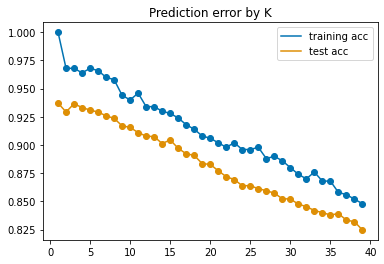

In [ ]:
from tqdm import tqdm

max_k=40

mse_train = []
mse_test = []
for i in tqdm(range(1, max_k, 1)):

  clf = neighbors.KNeighborsClassifier(n_neighbors=i)
  clf.fit(dat, labs)

  train_preds = clf.predict(dat)
  test_preds = clf.predict(test_dat)

  mse_test_i = sum(test_preds == test_labs)/len(test_dat.index)
  mse_test.append(mse_test_i)
  mse_train_i = sum(train_preds == labs)/len(dat.index)
  mse_train.append(mse_train_i)
  print('degree', i, "test_acc:", mse_test_i, "train_acc:", mse_train_i)
  
plt.scatter(range(1, max_k, 1), mse_train)
plt.plot(range(1, max_k, 1), mse_train, label = 'training acc')
plt.scatter(range(1, max_k, 1), mse_test)
plt.plot(range(1, max_k, 1), mse_test, label = 'test acc')
plt.legend()
# plt.yscale("log")
plt.title('Prediction error by K')
plt.show()